## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

###*Responses*

1. Regression predicts continuous values (like house prices), while classification predicts categories (like yes/no).

2. A confusion table shows how often a model's predictions match actual labels and helps us see how well the model distinguishes between different classes.

3. SSE measures how far the predicted values are from the actual values in a regression model, with smaller values meaning better performance.

4. Overfitting happens when a model is too complex and fits the training data too closely, missing general patterns. Underfitting occurs when a model is too simple and misses important trends.

5. Splitting data allows us to train the model on one part (training set) and test its performance on unseen data (test set), helping to choose a model that works well for new data.

6. Giving a class label is simple and easy to understand, but it doesn't reveal the model's confidence or account for uncertainty in the prediction. Using a probability distribution helps reveal the model’s confidence by showing how likely each class is. However, probability distributions can be harder to interpret and might be less useful when a clear decision is needed.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

(2499, 3)
<bound method NDFrame.describe of       price  year  mileage
0      6300  2008   274117
1      2899  2011   190552
2      5350  2018    39590
3     25000  2014    64146
4     27700  2018     6654
...     ...   ...      ...
2494   7800  2019    23609
2495   9200  2018    34553
2496   9200  2018    31594
2497   9200  2018    32557
2498   9200  2018    31371

[2499 rows x 3 columns]>
   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


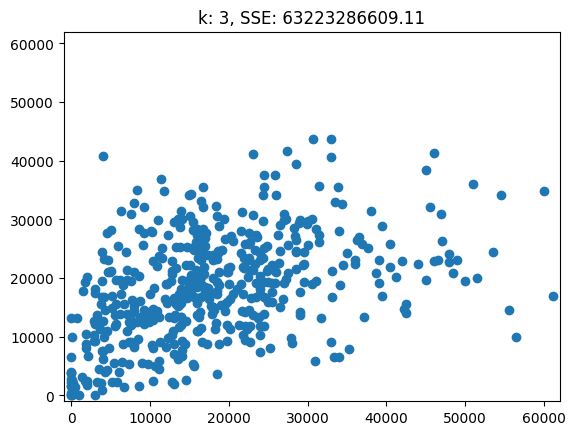

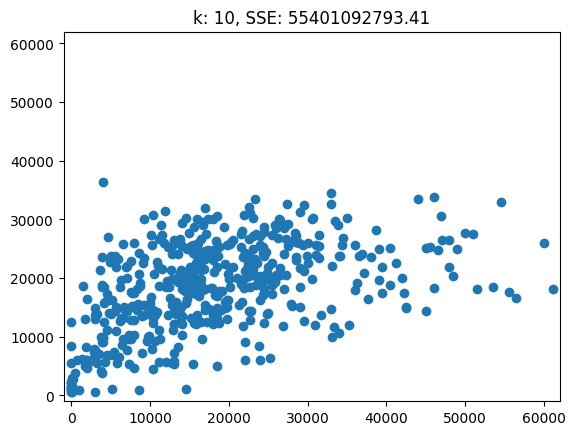

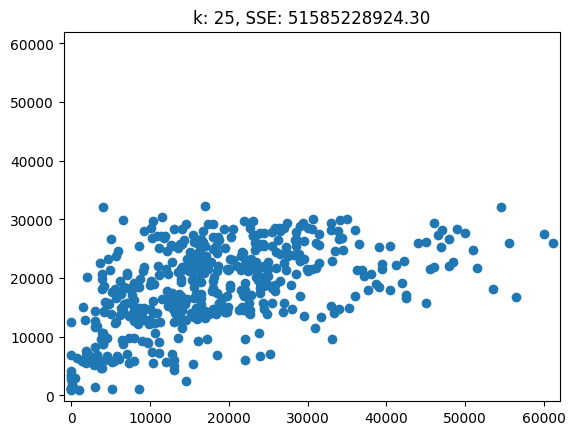

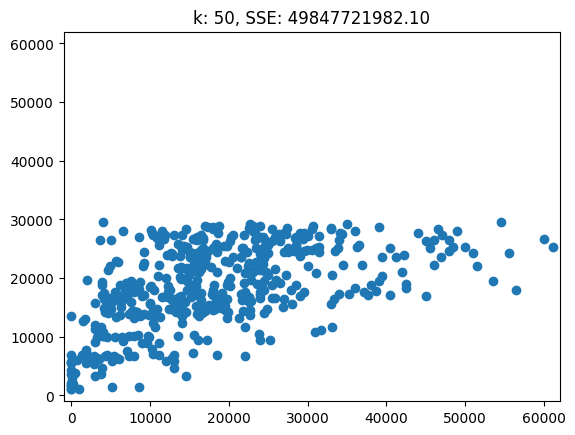

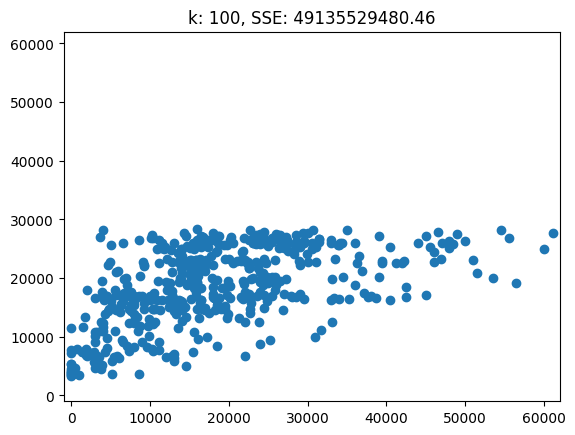

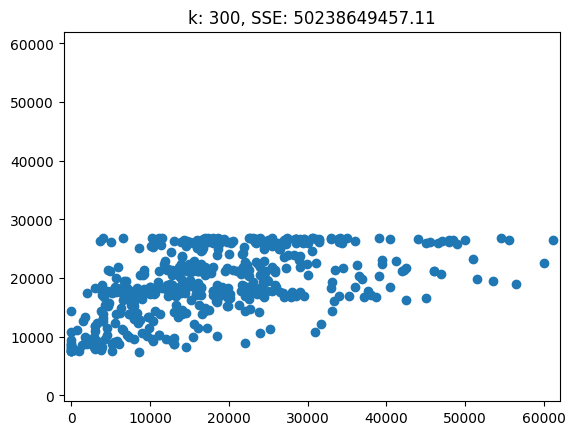

[77]


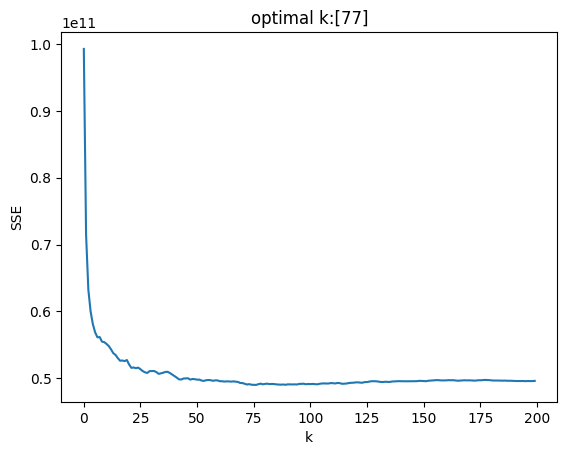

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#part 1

df = pd.read_csv('/content/USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]
print(df.shape)
print(df.describe)
df.head()
##there are no NANs to handle, due to all 2499 observations being present

#part 2

#normalize the data
def maxmin_normalize(df, columns):
    df[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())
    return df

df = maxmin_normalize(df, ['year', 'mileage'])
print(df.head())

#part 3

#split data into training and testing sets
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

#part 4

#knn prediction and data vis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

for k in [3, 10, 25, 50, 100, 300]:
    y_hat = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train).predict(X_test)

    SSE = mean_squared_error(y_test, y_hat) * len(y_test)

    fig, ax = plt.subplots()
    ax.scatter(y_test, y_hat)
    ax.set_title(f'k: {k}, SSE: {SSE:.2f}')
    ax.set_ylim(-1000, 62000)
    ax.set_xlim(-1000, 62000)

    plt.show()

#part 5

#find optimal 'k' and visualize
from sklearn.neighbors import KNeighborsRegressor

k_bar = 200
k_grid = np.arange(1, k_bar + 1)
SSE = []

for k in range(1, k_bar + 1):
    fitted_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE.append(np.sum((y_test - y_hat) ** 2))

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

#part 6

#We are looking at predicting car prices based on their year and mileage. The best value for k is about 77. When k is 300, the model overfits. For k values of 3, 10, and 25, the model underfits. When k is 50 or 100, the predictions are pretty close to the actual prices.
#With k = 300, we see many predictions grouped in horizontal lines, which isn't realistic since the data is more varied. For very small \( k \) values like 3, the predictions are all over the place and not very accurate.
#Also, as k increases, the predictions get narrower. The extreme high prices have less impact, and the predictions move closer to average prices.

